In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_img_dir = r"D:\Users\6 Emotions for image classification\train"
test_img_dir = r"D:\Users\6 Emotions for image classification\test"

In [3]:
width,height = 400,400

In [4]:
train_data_generator = ImageDataGenerator(
     
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255,
    
)

In [5]:
test_data_generator = ImageDataGenerator(rescale=1.0/255)

In [6]:
train_data = train_data_generator.flow_from_directory(

    train_img_dir,
    target_size=(400,400),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=20,
   
)

Found 579 images belonging to 6 classes.


In [7]:
test_data = test_data_generator.flow_from_directory(
     test_img_dir,
    target_size=(400,400),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=20,
)

Found 228 images belonging to 6 classes.


In [8]:
train_data.class_indices

{'anger': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'pain': 4, 'sad': 5}

In [9]:
model = Sequential([
    Conv2D(filters=128,kernel_size=(3,3),activation="relu",input_shape=(400,400,3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(50,activation="relu"),
    Dense(10,activation="relu"),
    Dense(6,activation="softmax")
])

In [10]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
history = model.fit(train_data,epochs=10,verbose=True,batch_size=30,validation_data=test_data)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 231s 8s/step - accuracy: 0.1457 - loss: 1.7957 - val_accuracy: 0.1579 - val_loss: 1.7909
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 214s 7s/step - accuracy: 0.1548 - loss: 1.7890 - val_accuracy: 0.1579 - val_loss: 1.7922
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 216s 7s/step - accuracy: 0.1899 - loss: 1.7816 - val_accuracy: 0.1754 - val_loss: 1.7950
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 215s 7s/step - accuracy: 0.1819 - loss: 1.7571 - val_accuracy: 0.1535 - val_loss: 1.8056
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 233s 8s/step - accuracy: 0.1985 - loss: 1.7690 - val_accuracy: 0.1886 - val_loss: 1.7897
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 227s 8s/step - accuracy: 0.2095 - loss: 1.7528 - val_accuracy: 0.1754 - val_loss: 1.7822
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 222s 8s/step - accuracy: 0.1615 - loss: 1.7508 - val_accuracy: 0.2061 - val_loss: 1.7750
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 228s 8s/step - accuracy: 0.2405 - loss: 1.7390 - val_accuracy: 0.2149 - v

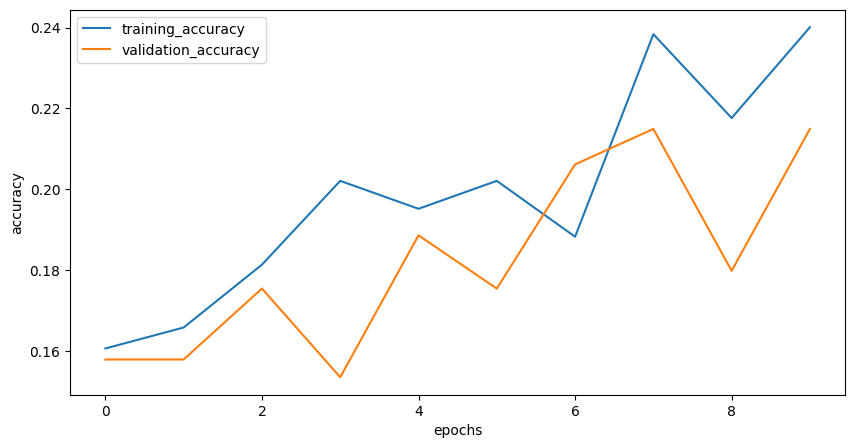

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"],label="training_accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()


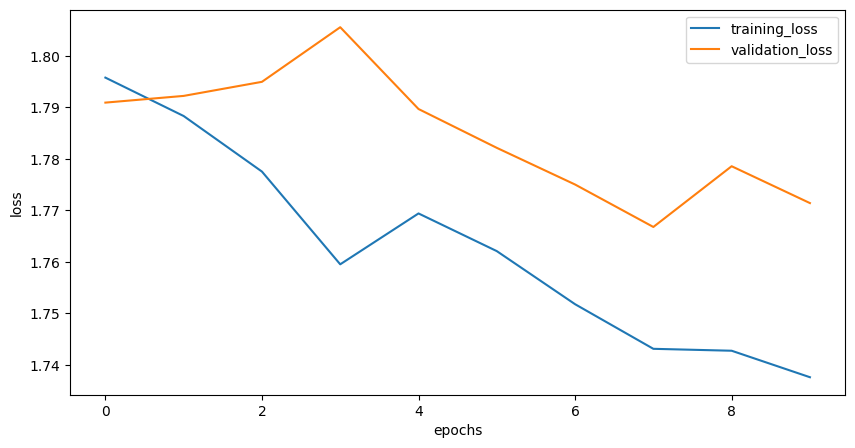

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="training_loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [27]:
classes = {v:k for k,v in train_data.class_indices.items() }

In [28]:
train_data.class_indices.items()

dict_items([('anger', 0), ('disgust', 1), ('fear', 2), ('happy', 3), ('pain', 4), ('sad', 5)])

In [29]:
classes

{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'pain', 5: 'sad'}

In [37]:
pred = np.argmax(model.predict(test_data),axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


In [38]:
pred

array([4, 3, 3, 0, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 5, 3, 3, 3, 3,
       3, 2, 2, 2, 3, 5, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 5, 3, 0, 2,
       5, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3, 5, 3, 3,
       3, 2, 2, 3, 3, 2, 3, 3, 5, 3, 3, 3, 2, 5, 2, 3, 5, 2, 2, 3, 0, 3,
       3, 2, 2, 3, 3, 3, 3, 5, 3, 3, 5, 5, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3,
       3, 2, 0, 3, 3, 5, 3, 2, 3, 3, 3, 5, 0, 3, 3, 2, 2, 3, 3, 2, 2, 4,
       3, 2, 2, 3, 2, 5, 3, 5, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 5, 3, 5, 2,
       3, 2, 3, 2, 2, 3, 3, 5, 3, 3, 5, 5, 3, 2, 3, 5, 3, 2, 2, 2, 3, 3,
       3, 2, 2, 3, 3, 3, 5, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 5, 2, 3, 3, 2,
       2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 0, 3, 3, 5, 3, 2, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 0, 5])

In [33]:
len(pred)

228

In [45]:
def image_prediction(img_dir):
    img = load_img(img_dir,target_size=(400,400))
    array_of_img = img_to_array(img)
    rescale_array = array_of_img/255.0
    flatten_array = np.expand_dims(rescale_array,axis=0)
    pred = np.argmax(model.predict(flatten_array),axis=1)[0]
    pred_class = classes[pred]
    return pred_class

In [46]:
image_prediction(r"D:\Users\6 Emotions for image classification\test\anger\maxresdefault2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


'fear'

In [47]:
image_prediction(r"D:\Users\6 Emotions for image classification\test\fear\pic62.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


'fear'

In [48]:
image_prediction(r"D:\Users\6 Emotions for image classification\test\happy\smiles_44.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


'fear'

In [49]:
image_prediction(r"D:\Users\6 Emotions for image classification\test\pain\pic25.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


'fear'